# Author : Shubham Jain
# Task 1  : Prediction using Supervised ML

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_excel("E:\\GRIP\\Sample data.xlsx")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Understanding the descriptive statisitcs

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Finding the missing value if any

In [65]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# There is no missing value in the given data.

# Finding the skewness to check for outliers if any

The skewness of the Hours is 0.1903382010052985


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


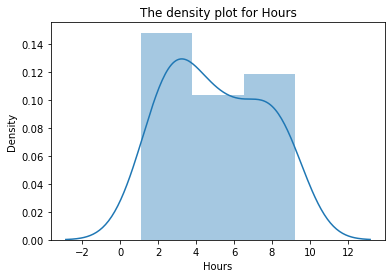

In [66]:
print("The skewness of the Hours is", data["Hours"].skew())
sns.distplot(data["Hours"])
plt.title("The density plot for Hours")
plt.show()

The skewness of the Scores is 0.2339646665397317


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


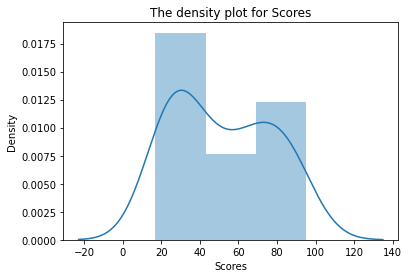

In [67]:
print("The skewness of the Scores is", data["Scores"].skew())
sns.distplot(data["Scores"])
plt.title("The density plot for Scores")
plt.show()

# As the skewness is less than 0.5, so the data is symmetric.

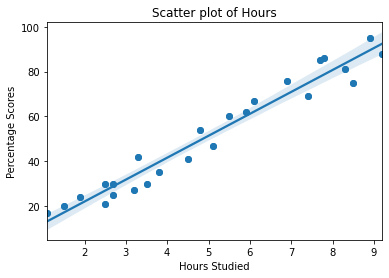

In [14]:
# Plotting scatter plot
plt.scatter(data["Hours"], data["Scores"])
sns.regplot(x = data["Hours"], y = data["Scores"])
plt.ylabel("Percentage Scores")
plt.xlabel("Hours Studied")
plt.title("Scatter plot of Hours")
plt.show()

# As the scatter plot shows a pattern, with the increment in hours, the scores also increases, 
# so that we can say that Hours and Scores are positively correlated.

In [16]:
# Dividing the data into two sets, one is train and other is test.
# importing some libraries required to test the data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Defining independent variable i.e Hours as X and dependent variable i.e Scores as Y.
X = data["Hours"]
y = data["Scores"]
# training data 70% and testing data 30% and randomise the data before splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [17]:
X_train.shape, X_test.shape

((17,), (8,))

In [18]:
# Fitting the linear regression model by OLS
X1 = sm.add_constant(X_train)
model = sm.OLS(y_train,X1)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sat, 15 May 2021   Prob (F-statistic):           6.28e-11
Time:                        14:11:36   Log-Likelihood:                -54.030
No. Observations:                  17   AIC:                             112.1
Df Residuals:                      15   BIC:                             113.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4245      3.172      0.764      0.4

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [62]:
# Since the R squared value is very high, so that we can say that the independenent variable has much effect on 
# dependent variable

# Prediction on test data

In [22]:
X1.shape

(17, 2)

In [23]:
X_test.shape

(8,)

In [56]:
X2 = sm.add_constant(X_test)
X2

,const,Hours
5,1.0,1.5
21,1.0,4.8
22,1.0,3.8
18,1.0,6.1
15,1.0,8.9
8,1.0,8.3
7,1.0,5.5
11,1.0,5.9


In [49]:
y_predict = res.predict(X2)

In [53]:
df = pd.DataFrame(columns = ["constant", "y_predict", "y_test", "Hours"])

In [58]:
df["y_test"] = y_test
df["y_predict"] = y_predict
df["constant"] = X2["const"]
df["Hours"] = X2["Hours"]
df

,constant,y_predict,y_test,Hours
5,1.0,16.805592,20,1.5
21,1.0,48.443888,54,4.8
22,1.0,38.856526,35,3.8
18,1.0,60.907459,67,6.1
15,1.0,87.752074,95,8.9
8,1.0,81.999657,81,8.3
7,1.0,55.155042,60,5.5
11,1.0,58.989987,62,5.9


In [38]:
# Calculating the residual mean squared value (rmse)
from sklearn.metrics import mean_squared_error
import math
actual = y_test
predicted = y_predict
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)
print("The rmse value is", rmse)

The rmse value is 4.731965754024233


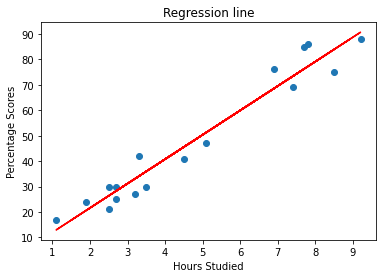

In [39]:
# Plotting the tested data
plt.scatter(X_train,y_train)
y_hat = 2.4245 + X * 9.5874
plt.plot(X, y_hat, c = "Red")
plt.title("Regression line")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.show()

# Predicting the score of a student who studies for 9.25 hrs/day.

In [61]:
Predicted_Scores = res.predict([1,9.25])
Predicted_Scores

array([91.10765132])

## So, if a student studies for 9.25 hours per day, he can get approximately 91.11 scores